# DBG data predicted with Tealeaves
This notebook uses the tealeaves R package to predict leaf temperature.

In [475]:
library(tealeaves)
library(magrittr)
library(ggplot2)

In [476]:
ccr_hourly_data <- read.csv('../data/ground/ccr_hourly_data.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
ccr_hourly_data <- ccr_hourly_data[!is.na(ccr_hourly_data$GW) & !is.na(ccr_hourly_data$leaftemp), ]
head(ccr_hourly_data)

,year,julian.day,standard.time,Solar_Wm2,Rain_mm,Wind_ms.1,Tair_C,Tsoil_C,D_kPa,GW,E.MD,P.PD,P.MD,leaftemp,leaf.air.temp.diff
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
489,2023,221,8,166.3020,0,1.5776670,32.92019,29.57,3.208325,365.0000,8.873387,NA,NA,29.67000,-3.2501900
497,2023,221,16,231.9475,0,2.3963330,39.52396,41.18,5.656041,286.2708,12.229683,NA,NA,36.28444,-3.2395156
513,2023,222,8,155.3611,0,2.3643330,31.91491,29.10,3.160281,278.4815,7.734187,NA,NA,29.28000,-2.6349100
521,2023,222,16,245.0766,0,0.8380666,38.64302,40.80,5.466050,250.4762,10.823967,NA,NA,35.18556,-3.4574644
657,2023,228,8,124.7265,0,0.0000000,32.57074,30.20,2.919558,312.4444,7.582487,NA,NA,29.62222,-2.9485178
665,2023,228,16,252.7352,0,1.6043330,42.26104,43.24,6.956127,172.0741,9.850785,NA,NA,41.42111,-0.8399289


In [477]:
rh <- read.csv("../trait-based-leaf-energy-balance-model/dataset_with_rh.csv")
head(rh)

,Year,Day,Hour,Solar_Wm2,Rain_mm,Wind_ms.1,Tair_C,D_kPa,RH_Perc
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023,201,0,0,6.57,1.01,36.498,4.600884,24.7
2,2023,201,1,0,0.25,0.50,34.624,4.072462,26.1
3,2023,201,2,0,0.25,0.00,30.874,3.128441,29.9
4,2023,201,3,0,0.25,0.00,30.925,3.083842,31.1
5,2023,201,4,0,0.25,0.00,30.293,2.853573,33.9
6,2023,201,5,0,0.25,0.00,29.065,2.634746,34.5


In [478]:
ccr_hourly_data <- merge(
    ccr_hourly_data, 
    rh[, c("Year", "Day", "Hour", "RH_Perc")], 
    by.x = c("year", "julian.day", "standard.time"), 
    by.y = c("Year", "Day", "Hour"), 
    all.x = TRUE
)
ccr_hourly_data <- ccr_hourly_data[order(ccr_hourly_data$year, ccr_hourly_data$julian.day, ccr_hourly_data$standard.time), ]

In [479]:
ccr_hourly_data$RH_Perc <- ccr_hourly_data$RH_Perc / 100
head(ccr_hourly_data)

,year,julian.day,standard.time,Solar_Wm2,Rain_mm,Wind_ms.1,Tair_C,Tsoil_C,D_kPa,GW,E.MD,P.PD,P.MD,leaftemp,leaf.air.temp.diff,RH_Perc
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2023,221,8,166.3020,0,1.5776670,32.92019,29.57,3.208325,365.0000,8.873387,NA,NA,29.67000,-3.2501900,0.3597206
1,2023,221,16,231.9475,0,2.3963330,39.52396,41.18,5.656041,286.2708,12.229683,NA,NA,36.28444,-3.2395156,0.2141109
4,2023,222,8,155.3611,0,2.3643330,31.91491,29.10,3.160281,278.4815,7.734187,NA,NA,29.28000,-2.6349100,0.3325285
3,2023,222,16,245.0766,0,0.8380666,38.64302,40.80,5.466050,250.4762,10.823967,NA,NA,35.18556,-3.4574644,0.2037288
6,2023,228,8,124.7265,0,0.0000000,32.57074,30.20,2.919558,312.4444,7.582487,NA,NA,29.62222,-2.9485178,0.4057842
5,2023,228,16,252.7352,0,1.6043330,42.26104,43.24,6.956127,172.0741,9.850785,NA,NA,41.42111,-0.8399289,0.1639447


In [480]:
data <- ccr_hourly_data[, c("year", "julian.day", "standard.time", "GW", "E.MD", "Solar_Wm2", "leaftemp", "Tair_C", "Wind_ms.1", "RH_Perc")]
colnames(data) <- c("year", "jd", "hour", "g_sw", "E", "S_sw", "leaftemp", "T_air", "wind", "RH")
data <- data[data$hour >= 12, ]  # afternoon only
head(data)

,year,jd,hour,g_sw,E,S_sw,leaftemp,T_air,wind,RH
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023,221,16,286.27083,12.229683,231.9475,36.28444,39.52396,2.3963330,0.2141109
3,2023,222,16,250.47619,10.823967,245.0766,35.18556,38.64302,0.8380666,0.2037288
5,2023,228,16,172.07407,9.850785,252.7352,41.42111,42.26104,1.6043330,0.1639447
7,2023,229,16,103.94444,6.641952,245.6236,41.97556,42.77151,0.8049667,0.1494189
9,2023,235,16,97.08333,4.996999,183.8074,38.80778,38.44973,2.9750000,0.1710959
11,2023,236,16,136.03704,6.876015,222.6477,40.43444,38.36154,2.3403330,0.2142211


In [481]:
# This function calculates the gcw (cuticular conductance)
# based on the given temperature (t).
#
# Parameters are taken from (Garen & Michaletz, 2025) for the
# Populus tremuloides population
#
# t is in C, and output is mmol m-2 s-1
calc_gcw_from_t <- function(t) {
    return (0.0035 * (t^2) - 0.186 * t + 5.12)
}

In [482]:
alt <- (380)  # meters
p_atm <- 101.325 * exp(-alt/8200)  # atmospheric pressure in kPa from C&H
d <- 0.034391333 * 0.72
T_air = 44.73006

In [483]:
p_atm
d

[1] 96.73659

[1] 0.02476176

In [484]:
run_tleaf_dbg <- function(
    g_sw,
    S_sw,
    T_air,
    wind,
    RH,
    alt=380,
    p_atm=96.7365,
    d=0.02476,
    abs_l=0.97,
    abs_s=0.5,
    r=0.5
) {

    # make in terms of (μmol H2O) / (m2 s Pa)
    g_sw = (g_sw * 1000) / (p_atm * 1000)
    g_uw = (calc_gcw_from_t(T_air) * 1000) / (p_atm * 1000)

    leaf_par   <- make_leafpar(
    replace = list(
        leafsize=set_units(d, "m"),
        abs_l=set_units(abs_l),
        abs_s=set_units(abs_s),
        g_sw=set_units(g_sw, "umol/m^2/s/Pa"),
        g_uw=set_units(g_uw, "umol/m^2/s/Pa")
    )
    )   # leaf parameters
    enviro_par <- make_enviropar(
        replace = list(
            P=set_units(p_atm, "kPa"),
            r=set_units(r),
            RH=set_units(RH),
            S_sw=set_units(S_sw, "W/m^2"),
            T_air=set_units(T_air + 273.15, "K"),
            wind=set_units(wind, "m/s")

        )
    ) # environmental parameters
    constants  <- make_constants() # physical constants

    T_leaf <- tleaf(leaf_par, enviro_par, constants, quiet = TRUE)

    return(T_leaf)
}

In [485]:
res <- apply(data, 1, function(row) {
    run_tleaf_dbg(
        row["g_sw"],
        row["S_sw"],
        row["T_air"],
        row["wind"],
        row["RH"]
    )
})
res %>% knitr::kable()



|     |       T_leaf|     value| convergence|            R_abs|              S_r|                 H|                L|                        E|        Ar|       Gr|       Re|      g_bw|
|:----|------------:|---------:|-----------:|----------------:|----------------:|-----------------:|----------------:|------------------------:|---------:|--------:|--------:|---------:|
|S_sw | 308.8366 [K]| 0.0001321|           0| 1194.812 [W/m^2]| 1000.691 [W/m^2]| -296.1808 [W/m^2]| 490.3017 [W/m^2]| 0.01126378 [mol/(m^2*s)]| 0.0001666| 1923.662| 3398.532| 0.0758373|

|     |       T_leaf|     value| convergence|            R_abs|              S_r|                 H|                L|                         E|       Ar|       Gr|       Re|     g_bw|
|:----|------------:|---------:|-----------:|----------------:|----------------:|-----------------:|----------------:|-------------------------:|--------:|--------:|--------:|--------:|
|S_sw | 307.7094 [K]| 0.0012789|           0| 1191.447 [W/m^2]| 

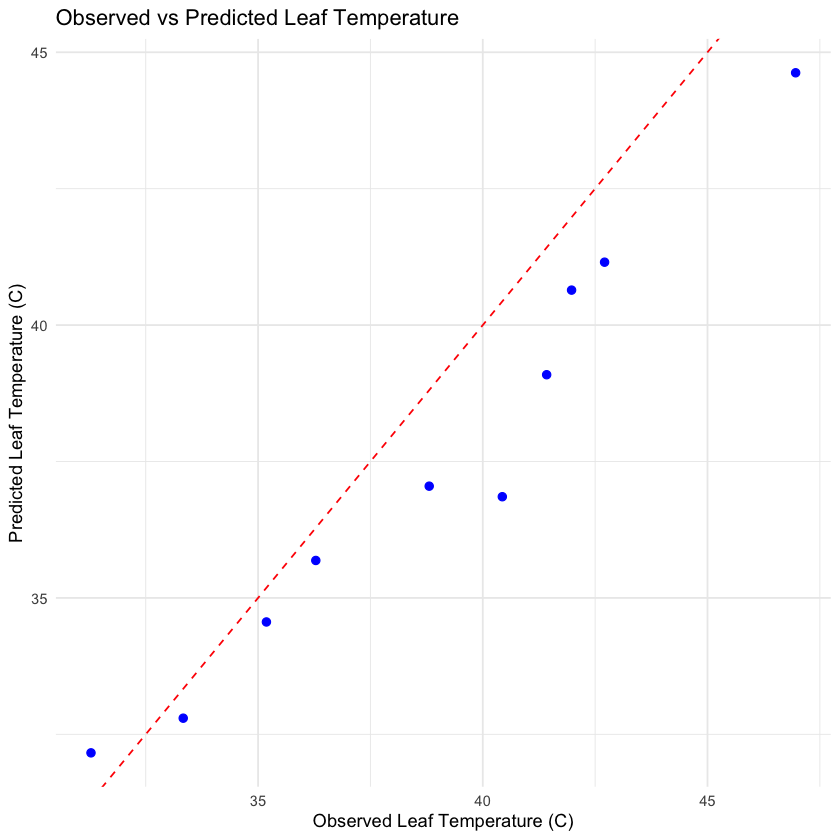

In [486]:
# Extract predicted T_leaf values from res
predicted_T_leaf <- sapply(res, function(x) as.numeric(x$T_leaf) - 273.15)

# Create a data frame for ggplot
scatter_data <- data.frame(
    Observed = data$leaftemp,
    Predicted = predicted_T_leaf
)

# Create the scatter plot using ggplot
ggplot(scatter_data, aes(x = Observed, y = Predicted)) +
    geom_point(color = "blue", size = 2) +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
    labs(
        x = "Observed Leaf Temperature (C)", 
        y = "Predicted Leaf Temperature (C)", 
        title = "Observed vs Predicted Leaf Temperature"
    ) +
    theme_minimal()

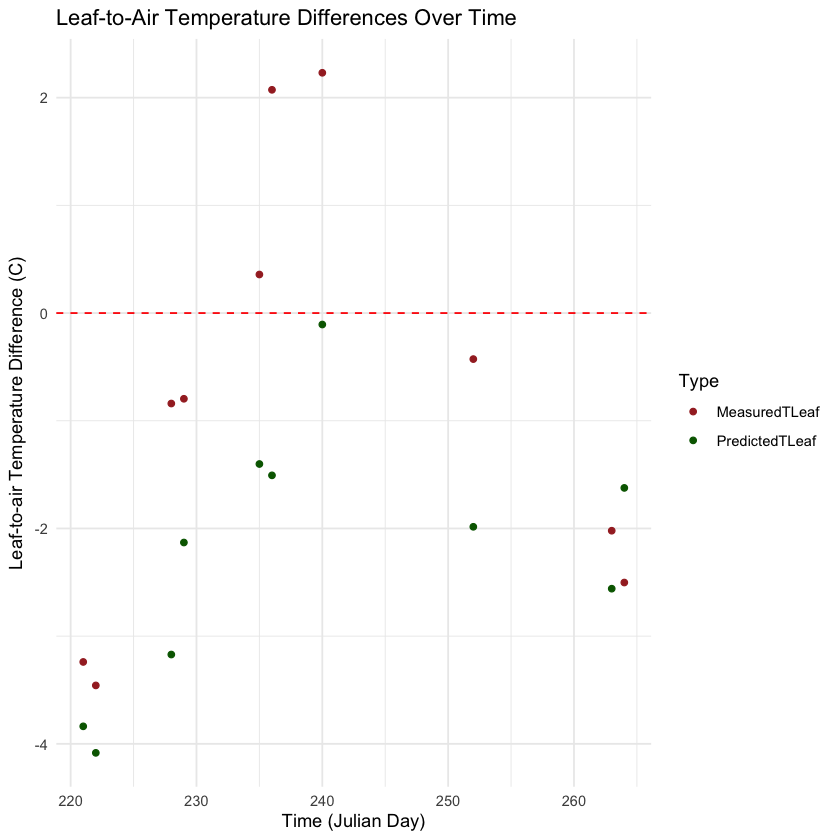

In [487]:
# Calculate the leaf-to-air temperature difference
leaf_to_air_diff <- predicted_T_leaf - data$T_air

# Calculate the ground leaf-to-air temperature difference
ground_leaf_to_air_diff <- data$leaftemp - data$T_air

# Create a data frame for plotting
plot_data <- data.frame(
    Time = data$jd,
    PredictedTLeaf = leaf_to_air_diff,
    MeasuredTLeaf = ground_leaf_to_air_diff
)

# Reshape the data for ggplot
library(tidyr)
plot_data_long <- plot_data %>%
    pivot_longer(cols = c("PredictedTLeaf", "MeasuredTLeaf"), 
                 names_to = "Type", 
                 values_to = "Difference")

# Plot using ggplot
ggplot(plot_data_long, aes(x = Time, y = Difference, color = Type)) +
    geom_point() +
    labs(
        x = "Time (Julian Day)", 
        y = "Leaf-to-air Temperature Difference (C)", 
        title = "Leaf-to-Air Temperature Differences Over Time"
    ) +
    scale_color_manual(values = c("PredictedTLeaf" = "darkgreen", "MeasuredTLeaf" = "brown")) +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red")

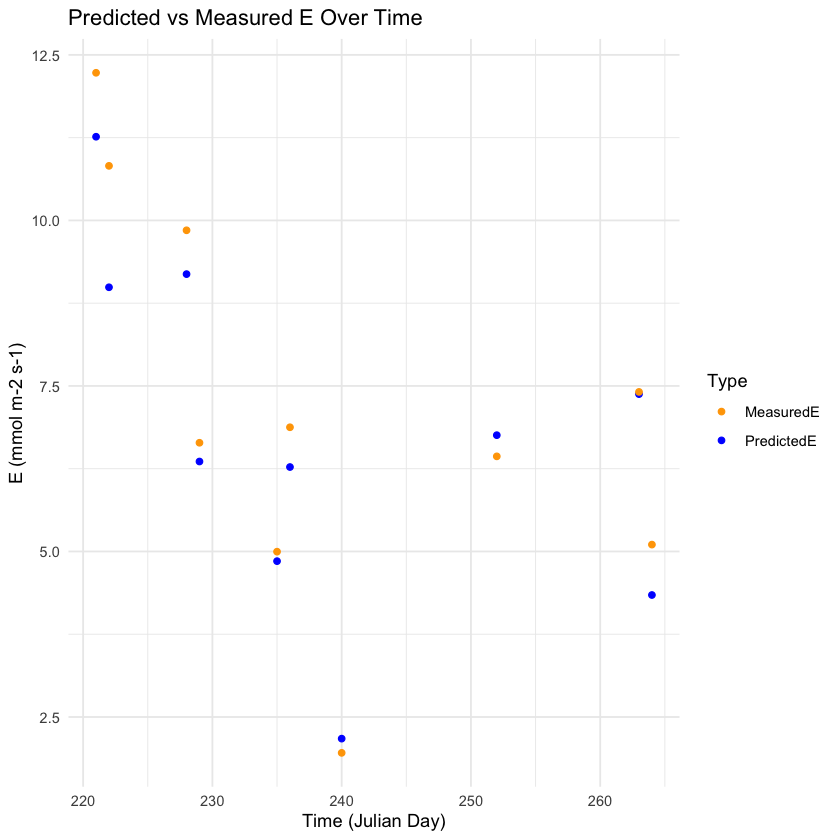

In [488]:
# Create a data frame for plotting
e_plot_data <- data.frame(
    JulianDay = data$jd,
    PredictedE = sapply(res, function(x) as.numeric(x$E) * 1000),
    MeasuredE = data$E
)

# Reshape the data for ggplot
e_plot_data_long <- e_plot_data %>%
    pivot_longer(cols = c("PredictedE", "MeasuredE"), 
                 names_to = "Type", 
                 values_to = "E")

# Plot using ggplot
ggplot(e_plot_data_long, aes(x = JulianDay, y = E, color = Type)) +
    geom_point() +
    labs(
        x = "Time (Julian Day)", 
        y = "E (mmol m-2 s-1)", 
        title = "Predicted vs Measured E Over Time"
    ) +
    scale_color_manual(values = c("PredictedE" = "blue", "MeasuredE" = "orange")) +
    theme_minimal()